In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load

In [2]:
raw_data = pd.read_json('./data.jsonl', lines=True)

# Data overview

In [3]:
raw_data.head(3)

,title,meta_1,meta_2,meta_3,passed_days,is_premium,دسته‌بندی شغلی,موقعیت مکانی,نوع همکاری,حداقل سابقه کار,حقوق,مهارت‌های مورد نیاز,جنسیت,وضعیت نظام وظیفه,حداقل مدرک تحصیلی,شرح موقعیت شغلی,معرفی شرکت,company_meta,زبان‌های مورد نیاز
0,کارشناس پشتیبانی و ارتباط با مشتریان (مرکز تماس),لندر | LANDER,تهران، تهران,قرارداد تمام‌وقت,(۱۸ روز پیش),True,[پشتیبانی و امور مشتریان],[تهران ، تهران],[تمام وقت],[کمتر از سه سال],"[از ۱۲,۰۰۰,۰۰۰ تومان]","[ارتباط با مشتریان و پشتیبانی, امورمشتریان, پا...",[مهم نیست],"[معافیت دائم, پایان خدمت]",[دیپلم],کارشناس پشتیبان تلفنی (بخش زیادی از کار حضوری ...,گروه لندر از سال ۱۳۸۵ در زمینه اینترنت اشیاء (...,"[تولید و صنایع, ۵۱ تا ۲۰۰ نفر, landerco.net]",NaN
1,کارمند فروش(خانم),موبیکار | Mobicar,تهران، تهران,قرارداد تمام‌وقت,(۹ روز پیش),False,[مسئول دفتر، اجرائی و اداری],[تهران ، تهران],[تمام وقت],[مهم نیست],[توافقی],"[فروش, اصول و فنون مذاکره, فروش و بازاریابی]",[زن],NaN,[مهم نیست],شرایط احراز: سن 22-30 سال پر انرژی و فعال آشنا...,موبیکار یک شرکت دانش بنیان با محیط پویا و منطب...,"[کامپیوتر، فناوری اطلاعات و اینترنت, ۱۱ تا ۵۰ ...",NaN
2,کارشناس حسابداری (خانم),سایت ایسام | Esam,تهران، تهران,قرارداد تمام‌وقت,(۱۳ روز پیش),True,[مالی و حسابداری],[تهران ، تهران],[تمام وقت],[سه تا شش سال],[توافقی],"[مالی و حسابداری, ثبت اسناد, حقوق و دستمزد, مو...",[زن],NaN,[کارشناسی],-آشنایی با سیستم های مالی حسابداری (سیستم راهک...,«ایسام» یک پلتفرم آنلاین برای خرید، فروش و مزا...,"[تاسیس در ۱۳۹۰, خرده‌فروشی، عمده‌فروشی و فروشگ...",NaN


In [4]:
raw_data.columns

Index(['title', 'meta_1', 'meta_2', 'meta_3', 'passed_days', 'is_premium',
       'دسته‌بندی شغلی', 'موقعیت مکانی', 'نوع همکاری', 'حداقل سابقه کار',
       'حقوق', 'مهارت‌های مورد نیاز', 'جنسیت', 'وضعیت نظام وظیفه',
       'حداقل مدرک تحصیلی', 'شرح موقعیت شغلی', 'معرفی شرکت', 'company_meta',
       'زبان‌های مورد نیاز'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25116 entries, 0 to 25115
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                25116 non-null  object
 1   meta_1               25116 non-null  object
 2   meta_2               25116 non-null  object
 3   meta_3               25116 non-null  object
 4   passed_days          25116 non-null  object
 5   is_premium           25116 non-null  bool  
 6   دسته‌بندی شغلی       25116 non-null  object
 7   موقعیت مکانی         25116 non-null  object
 8   نوع همکاری           25116 non-null  object
 9   حداقل سابقه کار      25092 non-null  object
 10  حقوق                 25116 non-null  object
 11  مهارت‌های مورد نیاز  25103 non-null  object
 12  جنسیت                25116 non-null  object
 13  وضعیت نظام وظیفه     20675 non-null  object
 14  حداقل مدرک تحصیلی    25101 non-null  object
 15  شرح موقعیت شغلی      25116 non-null  object
 16  معرف

In [6]:
raw_data['جنسیت'].map(lambda a: a[0]).unique()

array(['مهم نیست', 'زن', 'مرد'], dtype=object)

In [7]:
raw_data['حقوق'].apply(lambda a: a[0]).unique()

array(['از ۱۲,۰۰۰,۰۰۰ تومان', 'توافقی', 'حقوق پایه (وزارت کار)',
       'از ۳۰,۰۰۰,۰۰۰ تومان', 'از ۱۳,۰۰۰,۰۰۰ تومان',
       'از ۱۵,۰۰۰,۰۰۰ تومان', 'از ۲۰,۰۰۰,۰۰۰ تومان',
       'از ۱۸,۰۰۰,۰۰۰ تومان', 'از ۹,۰۰۰,۰۰۰ تومان', 'از ۲۴,۰۰۰,۰۰۰ تومان',
       'از ۱۴,۰۰۰,۰۰۰ تومان', 'از ۱۰,۰۰۰,۰۰۰ تومان', 'از ۵,۰۰۰,۰۰۰ تومان',
       'از ۱۱,۰۰۰,۰۰۰ تومان', 'از ۲۲,۰۰۰,۰۰۰ تومان',
       'از ۱۶,۰۰۰,۰۰۰ تومان', 'از ۲۸,۰۰۰,۰۰۰ تومان',
       'از ۵۰,۰۰۰,۰۰۰ تومان', 'از ۳۵,۰۰۰,۰۰۰ تومان',
       'از ۲۶,۰۰۰,۰۰۰ تومان', 'از ۷,۰۰۰,۰۰۰ تومان', 'از ۶,۰۰۰,۰۰۰ تومان',
       'از ۴۰,۰۰۰,۰۰۰ تومان', 'از ۴,۵۰۰,۰۰۰ تومان', 'از ۴۵,۰۰۰,۰۰۰ تومان',
       'از ۸,۰۰۰,۰۰۰ تومان', 'از ۵,۵۰۰,۰۰۰ تومان', 'از ۶,۵۰۰,۰۰۰ تومان'],
      dtype=object)

# Date Preparation

In [8]:
df = raw_data.copy()

In [9]:
def extract_first_element(value):
    if isinstance(value, list):
        return value[0]
    else:
        return 'مهم‌ نیست'

# لیستی از ستون‌هایی که می‌خواهیم روی آن‌ها عمل کنیم
columns_to_process = ['جنسیت', 'حقوق', 'حداقل سابقه کار', 'نوع همکاری', 'حداقل مدرک تحصیلی' , 'دسته‌بندی شغلی']

# اعمال تابع روی ستون‌های مشخص شده
df[columns_to_process] = df[columns_to_process].map(extract_first_element)

In [10]:
df['استان موقعیت'] = df['موقعیت مکانی'].map(lambda a: a[0].split('،')[0].strip())
df['شهر موقعیت'] = df['موقعیت مکانی'].map(lambda a: a[0].split('،')[1].strip())
df.drop(['موقعیت مکانی', 'meta_2'], axis=1, inplace=True)

In [11]:
def sort_and_join(value):
    if isinstance(value, list):
        return ', '.join(sorted(map( lambda a: a.strip(), value)))
    else:
        return 'مهم‌ نیست'

df['وضعیت نظام وظیفه'] = df['وضعیت نظام وظیفه'].apply(sort_and_join)

In [12]:
df['زبان‌های مورد نیاز'] = df['زبان‌های مورد نیاز'].fillna('مشخص نشده')

In [13]:
def extract_text_value(array):
    for value in array:
        if "نفر" in value:
            return value
    return None

df['company_size'] = df['company_meta'].apply(extract_text_value)
df.drop('company_meta', axis=1, inplace=True)

In [14]:
import pandas as pd
import re

def convert_to_number(value):
    match = re.match(r'\((\d+) روز پیش\)', value)
    if match:
        return int(match.group(1))
    else:
        return None
df['passed_days'] = df['passed_days'].apply(convert_to_number)

In [15]:
def convert_payment(value):
    if value == 'توافقی':
        return None
    elif value == 'حقوق پایه (وزارت کار)':
        return 12_000_000
    else:
        return int(value.replace(',', '').replace(' ' , '').replace('از', '').replace('تومان', ''))


df['حقوق'] = df['حقوق'].apply(convert_payment)
# convert_payment('از ۱۵,۰۰۰,۰۰۰ تومان')

In [16]:
df = df[(df['meta_1'] != 'املاک ارمغان | Amlak Armaghan') & (df['حداقل مدرک تحصیلی'] != 'مهم\u200c نیست')]


In [17]:
df.head(2)

,title,meta_1,meta_3,passed_days,is_premium,دسته‌بندی شغلی,نوع همکاری,حداقل سابقه کار,حقوق,مهارت‌های مورد نیاز,جنسیت,وضعیت نظام وظیفه,حداقل مدرک تحصیلی,شرح موقعیت شغلی,معرفی شرکت,زبان‌های مورد نیاز,استان موقعیت,شهر موقعیت,company_size
0,کارشناس پشتیبانی و ارتباط با مشتریان (مرکز تماس),لندر | LANDER,قرارداد تمام‌وقت,18.0,True,پشتیبانی و امور مشتریان,تمام وقت,کمتر از سه سال,12000000.0,"[ارتباط با مشتریان و پشتیبانی, امورمشتریان, پا...",مهم نیست,"معافیت دائم, پایان خدمت",دیپلم,کارشناس پشتیبان تلفنی (بخش زیادی از کار حضوری ...,گروه لندر از سال ۱۳۸۵ در زمینه اینترنت اشیاء (...,مشخص نشده,تهران,تهران,۵۱ تا ۲۰۰ نفر
1,کارمند فروش(خانم),موبیکار | Mobicar,قرارداد تمام‌وقت,9.0,False,مسئول دفتر، اجرائی و اداری,تمام وقت,مهم نیست,NaN,"[فروش, اصول و فنون مذاکره, فروش و بازاریابی]",زن,مهم‌ نیست,مهم نیست,شرایط احراز: سن 22-30 سال پر انرژی و فعال آشنا...,موبیکار یک شرکت دانش بنیان با محیط پویا و منطب...,مشخص نشده,تهران,تهران,۱۱ تا ۵۰ نفر


# Exploration and Visualization

## Gender

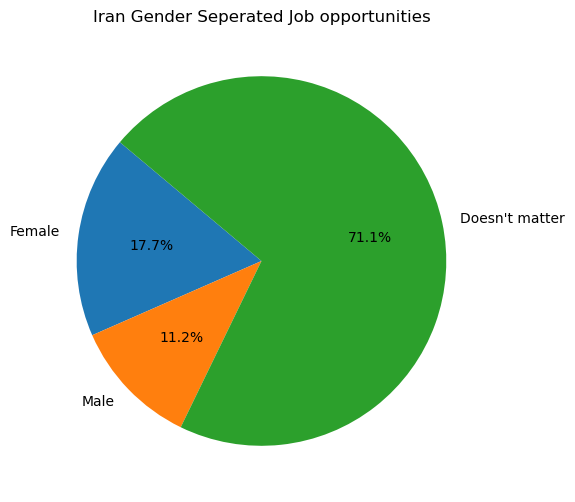

In [18]:
grouped_gender_data = df.groupby('جنسیت').size().set_axis(['Female', 'Male', 'Doesn\'t matter'])
plt.figure(figsize=(8, 6))
plt.pie(grouped_gender_data, labels=grouped_gender_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Iran Gender Seperated Job opportunities')
# plt.show()
plt.savefig('a.png')

In [19]:
pd.DataFrame(df[df['جنسیت'] == 'زن'].groupby('دسته‌بندی شغلی').size().sort_values(ascending=False).head(10), columns=['count']).reset_index()

,دسته‌بندی شغلی,count
0,مسئول دفتر، اجرائی و اداری,1229
1,فروش و بازاریابی,893
2,مالی و حسابداری,601
3,تولید و مدیریت محتوا,307
4,پشتیبانی و امور مشتریان,258
5,دیجیتال مارکتینگ,147
6,پزشکی،‌ پرستاری و دارویی,110
7,آموزش,107
8,طراحی,102
9,خرید و بازرگانی,87


In [20]:
pd.DataFrame(df[df['جنسیت'] == 'مرد'].groupby('دسته‌بندی شغلی').size().sort_values(ascending=False).head(10), columns=['count']).reset_index()

,دسته‌بندی شغلی,count
0,فروش و بازاریابی,356
1,کارگر ساده، نیروی خدماتی,264
2,IT / DevOps / Server,214
3,انبارداری,214
4,تکنسین فنی، تعمیرکار,189
5,مالی و حسابداری,178
6,وب،‌ برنامه‌نویسی و نرم‌افزار,162
7,مهندسی برق و الکترونیک,147
8,مسئول دفتر، اجرائی و اداری,104
9,کارگر ماهر، کارگر صنعتی,98


In [21]:
grouped_category_gender = df.groupby(['دسته‌بندی شغلی', 'جنسیت']).size().reset_index(name='count')
total_count_percentage = grouped_category_gender.groupby('دسته‌بندی شغلی')['count'].transform('sum')
grouped_category_gender['percentage'] = (grouped_category_gender['count'] / total_count_percentage) * 100
category_gender_pivot = grouped_category_gender.pivot(index='دسته‌بندی شغلی', columns='جنسیت', values='percentage').fillna(0)
category_gender_pivot.sort_values('دسته‌بندی شغلی')

جنسیت,زن,مرد,مهم نیست
دسته‌بندی شغلی,,,
CEO,0.000000,33.333333,66.666667
HSE,3.703704,33.333333,62.962963
IT / DevOps / Server,1.909548,21.507538,76.582915
آموزش,25.598086,2.392344,72.009569
انبارداری,2.194357,67.084639,30.721003
تحقیق بازار و تحلیل اقتصادی,2.840909,6.250000,90.909091
تحقیق و توسعه,3.937008,8.661417,87.401575
تربیت بدنی,53.846154,15.384615,30.769231
ترجمه,33.823529,1.470588,64.705882


In [22]:
category_gender_pivot.sort_values('زن', ascending=False).head().reset_index()

جنسیت,دسته‌بندی شغلی,زن,مرد,مهم نیست
0,مسئول دفتر، اجرائی و اداری,61.053154,5.166418,33.780427
1,تربیت بدنی,53.846154,15.384615,30.769231
2,پزشکی،‌ پرستاری و دارویی,53.140097,1.932367,44.927536
3,مهندسی نساجی، طراحی پارچه و لباس,41.935484,19.354839,38.709677
4,ترجمه,33.823529,1.470588,64.705882


In [23]:
category_gender_pivot.sort_values('مهم نیست', ascending=False).head(10).reset_index()

جنسیت,دسته‌بندی شغلی,زن,مرد,مهم نیست
0,حوزه‌ موسیقی و صدا,0.000000,0.000000,100.000000
1,مدیر محصول,0.531915,3.723404,95.744681
2,وب،‌ برنامه‌نویسی و نرم‌افزار,1.872031,4.526404,93.601565
3,تحقیق بازار و تحلیل اقتصادی,2.840909,6.250000,90.909091
4,خبر‌نگاری,12.000000,0.000000,88.000000
5,طراحی,9.742120,2.769819,87.488061
6,تحقیق و توسعه,3.937008,8.661417,87.401575
7,دیجیتال مارکتینگ,12.270451,2.504174,85.225376
8,گردشگری,16.406250,1.171875,82.421875
9,شیمی، داروسازی,11.764706,5.882353,82.352941


In [24]:
category_gender_pivot.sort_values('مرد', ascending=False).head(5).reset_index()

جنسیت,دسته‌بندی شغلی,زن,مرد,مهم نیست
0,نگهبان,1.886792,83.018868,15.094340
1,راننده، پیک موتوری,1.010101,81.818182,17.171717
2,انبارداری,2.194357,67.084639,30.721003
3,تکنسین فنی، تعمیرکار,2.054795,64.726027,33.219178
4,کارگر ماهر، کارگر صنعتی,3.289474,64.473684,32.236842


## Income

In [25]:
gender_icome = pd.DataFrame(df[df['حقوق'].notnull()].groupby('جنسیت')['حقوق'].mean())
gender_icome

,حقوق
جنسیت,
زن,1.341032e+07
مرد,1.586683e+07
مهم نیست,1.732898e+07


In [26]:
(gender_icome.loc['مرد'] / gender_icome.loc['زن']) * 100

حقوق    118.318038
dtype: float64

In [27]:
category_grouped = (df.groupby('دسته‌بندی شغلی').size().sort_values(ascending=False) / df.shape[0]) * 100 
# plt.pie(category_grouped, labels=category_grouped.index)
# plt.legend()
# plt.show()

categ_perc = category_grouped[category_grouped > 1]
categ_perc['غیره'] = 100 - categ_perc.sum()
pd.DataFrame(categ_perc.round(2), columns=['درصد']).reset_index()

,دسته‌بندی شغلی,درصد
0,فروش و بازاریابی,16.96
1,وب،‌ برنامه‌نویسی و نرم‌افزار,14.26
2,مالی و حسابداری,10.44
3,مسئول دفتر، اجرائی و اداری,8.02
4,تولید و مدیریت محتوا,5.22
5,دیجیتال مارکتینگ,4.77
6,پشتیبانی و امور مشتریان,4.53
7,طراحی,4.17
8,IT / DevOps / Server,3.96
9,مهندسی صنایع و مدیریت صنعتی,2.15


In [28]:
income_cate_grouped = df[df['حقوق'].notnull()].groupby('دسته‌بندی شغلی')['حقوق'].mean().sort_values(ascending=False) / 1000_000
pd.DataFrame(income_cate_grouped).reset_index()

,دسته‌بندی شغلی,حقوق
0,مدیر محصول,31.333333
1,CEO,24.500000
2,وب،‌ برنامه‌نویسی و نرم‌افزار,23.870722
3,تحقیق و توسعه,21.142857
4,تحقیق بازار و تحلیل اقتصادی,20.060606
5,مهندسی صنایع و مدیریت صنعتی,19.890511
6,IT / DevOps / Server,19.183962
7,HSE,18.785714
8,مهندسی عمران و معماری,18.638889
9,مهندسی پلیمر,18.250000


In [29]:
(df['حقوق'].notnull().sum() / df.shape[0]) * 100

37.69969323931318

In [30]:
pd.DataFrame((df['حداقل سابقه کار'].value_counts(normalize=True) * 100).round(2)).reset_index()

,حداقل سابقه کار,proportion
0,کمتر از سه سال,36.48
1,سه تا شش سال,31.23
2,مهم نیست,27.50
3,بیش از شش سال,4.73
4,مهم‌ نیست,0.05


In [31]:
pd.DataFrame((df[df['حقوق'].notnull()].groupby('حداقل سابقه کار')['حقوق'].mean() / 1000000).round(2).sort_values(ascending=False)).reset_index()

,حداقل سابقه کار,حقوق
0,بیش از شش سال,28.50
1,سه تا شش سال,19.32
2,کمتر از سه سال,14.18
3,مهم نیست,14.06


In [32]:
pd.DataFrame(df[df['حقوق'].notnull()].groupby('حداقل مدرک تحصیلی')['حقوق'].mean().sort_values(ascending=False) / 1000_000).reset_index()

,حداقل مدرک تحصیلی,حقوق
0,کارشناسی ارشد,25.762712
1,دکترا,23.583333
2,کارشناسی,17.658349
3,مهم نیست,15.908333
4,کاردانی,14.198308
5,دیپلم,13.440080


## وضعیت خدمت سربازی

In [33]:
pd.DataFrame((df[(df['جنسیت'] != 'زن') & (df['حقوق'].notnull()) ].groupby('وضعیت نظام وظیفه')['حقوق'].mean() / 1000000).round(2).sort_values(ascending=False)).reset_index()

,وضعیت نظام وظیفه,حقوق
0,"معافیت دائم, پایان خدمت",18.19
1,"معافیت تحصیلی, معافیت دائم, پایان خدمت",17.03
2,مهم‌ نیست,16.90
3,پایان خدمت,16.13
4,معافیت دائم,14.76
5,"معافیت تحصیلی, پایان خدمت",13.75
6,معافیت تحصیلی,12.40
7,"معافیت تحصیلی, معافیت دائم",12.00


In [34]:
pd.DataFrame((df[df['جنسیت'] != 'زن']['وضعیت نظام وظیفه'].value_counts(normalize=True) * 100).round(2)).reset_index()

,وضعیت نظام وظیفه,proportion
0,مهم‌ نیست,71.35
1,"معافیت دائم, پایان خدمت",18.20
2,"معافیت تحصیلی, معافیت دائم, پایان خدمت",6.41
3,پایان خدمت,3.67
4,معافیت دائم,0.18
5,"معافیت تحصیلی, پایان خدمت",0.11
6,معافیت تحصیلی,0.06
7,"معافیت تحصیلی, معافیت دائم",0.02


## پاره وقت و دورکاری

In [35]:
pd.DataFrame((df['نوع همکاری'].value_counts(normalize=True) * 100).round(2)).reset_index()

,نوع همکاری,proportion
0,تمام وقت,93.71
1,پاره وقت,6.29


In [36]:
round((df['title'].str.contains('دورکار').sum() / df.shape[0]) * 100, 2)

4.84

In [37]:
pd.DataFrame((df['حداقل مدرک تحصیلی'].value_counts(normalize=True) * 100).round(2)).reset_index()

,حداقل مدرک تحصیلی,proportion
0,کارشناسی,45.82
1,مهم نیست,32.48
2,دیپلم,10.69
3,کاردانی,9.19
4,کارشناسی ارشد,1.67
5,دکترا,0.15


## Job position per province

In [38]:
job_by_province_size = pd.DataFrame(df.groupby('استان موقعیت').size().sort_values(ascending=False), columns=['jobs_number']).reset_index()
job_by_province_size

,استان موقعیت,jobs_number
0,تهران,20488
1,خراسان رضوی,1301
2,اصفهان,733
3,البرز,670
4,فارس,397
5,قم,225
6,آذربایجان شرقی,159
7,مازندران,150
8,گیلان,126
9,خوزستان,109


In [39]:
population_df = pd.read_csv('./iran2016census.csv')

In [40]:
population_df['age_group']

0         0-4
1         5-9
2       10-14
3       15-19
4       20-24
        ...  
9004    80-84
9005    85-89
9006    90-94
9007    95-99
9008     >100
Name: age_group, Length: 9009, dtype: object

In [41]:
population = population_df.groupby('province_name')[['male', 'female']].sum()

In [42]:
pop_df = pd.DataFrame(population['male'] + population['female'], columns=['population']).reset_index()
pop_df

,province_name,population
0,آذربایجان شرقی,3909652
1,آذربایجان غربی,3265219
2,اردبیل,1270420
3,اصفهان,5120850
4,البرز,2712400
5,ایلام,580158
6,بوشهر,1163400
7,تهران,13267637
8,خراسان جنوبی,768898
9,خراسان رضوی,6434501


In [43]:
merged_job_province = pd.merge(job_by_province_size, pop_df, left_on='استان موقعیت', right_on='province_name')
merged_job_province['job_per_person'] = (merged_job_province['population'] / merged_job_province['jobs_number']).round()
merged_job_province[['استان موقعیت', 'job_per_person']].sort_values(by='job_per_person', ascending=True).reset_index(drop=True)

,استان موقعیت,job_per_person
0,تهران,648.0
1,البرز,4048.0
2,خراسان رضوی,4946.0
3,قم,5743.0
4,اصفهان,6986.0
5,یزد,11618.0
6,فارس,12220.0
7,قزوین,17691.0
8,گیلان,20085.0
9,مرکزی,21335.0
